In [1]:
# Typical Everydayers...
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from joypy import joyplot
from wordcloud import WordCloud, STOPWORDS
# Unicode, Regex, json for text digestion
import unicodedata
import re
import json

import datetime
# Time formatting
from time import strftime
# Make deepcopy
import copy

# Modeling help...
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# nltk: natural language toolkit -> tokenization, stopwords
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer as stemmer
# nltk.download('stopwords')
import nltk.sentiment
sia = nltk.sentiment.SentimentIntensityAnalyzer()

# Import prepare
import draft_prepare as p

# Quieeet!!! Y'all can't stop me now...
import warnings
warnings.filterwarnings('ignore')

# Let me see it AAAALLLL!!!
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

# set default style for charts
plt.rc('figure', figsize=(13, 7))
plt.style.use('fivethirtyeight')

### Preparing the data:

In [2]:
# df = p.model_clean(df)
# df.head()

In [3]:
# df = pd.read_csv('songs_0526.csv')
# df.shape

In [4]:
df = p.get_data(file="songs_0526.csv")


Great Success!!!!!!!!!!!!!!!**


In [5]:
df = p.get_topics(df)


In [6]:
df.head()


,title,artist,date,lyrics,raw_lyrics,decade,character_count,word_count,unique_words,unique_words_count,sentiment,sentiment_category,place_words,chorus_count,verse_count,verse_chorus_ratio,pre_chorus_count,outro_count,bridge_count,hook_count,bigrams,trigrams,topic_name
0,#1,Nelly,2001-10-20,uh uh uh got bring attention dirty better watc...,#1 LyricsUh uh uh I just gotta bring it to the...,2000,2014,363,comin naw granted driver remembers tell man sh...,228,0.9915,very positive,[hook] [hook] [hook],0,0,0.000000,0,0,0,3,"[(uh, uh), (uh, uh), (uh, got), (got, bring), ...","[(uh, uh, uh), (uh, uh, got), (uh, got, bring)...",sex
1,#9 Dream,John Lennon,1974-12-21,long ago dream dream know yes know seemed real...,#9 Dream Lyrics[Verse 1] So long ago Was it in...,1970,842,135,warm cold seemed dancing believe know river da...,49,0.9169,very positive,[verse 1] [pre-chorus 1] [chorus] [verse 2] [p...,2,2,1.000000,2,1,0,0,"[(long, ago), (ago, dream), (dream, dream), (d...","[(long, ago, dream), (ago, dream, dream), (dre...",love
2,#Beautiful,Mariah Carey Featuring Miguel,2013-05-25,ah ah beautiful ah ah beautiful hop back bike ...,"#Beautiful Lyrics[Intro: Mariah Carey] Ah, ah,...",2010,768,129,middle darling lord know light killing dance w...,54,0.9989,very positive,[intro: mariah carey] [verse 1: miguel] [choru...,2,2,1.000000,0,1,0,0,"[(ah, ah), (ah, beautiful), (beautiful, ah), (...","[(ah, ah, beautiful), (ah, beautiful, ah), (be...",lost
3,#SELFIE,The Chainsmokers,2014-03-15,jason table kept seeing look girl think make j...,#SELFIE Lyrics[Verse 1] When Jason was at the ...,2010,954,172,really see next follower jealous creep took th...,100,0.9218,very positive,[verse 1] [drop 1] [verse 2] [drop 2] [verse 3...,0,3,inf,0,0,0,0,"[(jason, table), (table, kept), (kept, seeing)...","[(jason, table, kept), (table, kept, seeing), ...",violence
4,#thatPOWER,will.i.am Featuring Justin Bieber,2013-04-06,oh alive alive alive oh fly fly fly oh alive a...,#thatPOWER Lyrics[Instrumental break] [Pre-Ch...,2010,1238,208,comin chilly progress project best mental fres...,77,0.9984,very positive,[instrumental break] [pre-chorus: justin biebe...,3,2,0.666667,3,1,1,0,"[(oh, alive), (alive, alive), (alive, alive), ...","[(oh, alive, alive), (alive, alive, alive), (a...",sex


## Topic Modeling

#### Latent Dirichlet Allocation:

In [7]:
# # Create an instance
# cv = CountVectorizer(max_df = .95, min_df = 2, stop_words = 'english')

# # Fit and transform the lemmatized lyrics data
# cv_fit = cv.fit_transform(df.lyrics)

# print('\nShape of the sparse matrix\n')
# cv_fit

In [8]:
# # Create the instance for LDA
# lda = LatentDirichletAllocation(n_components = 20, random_state = 42)

# # Fit the vectorizer with the LDA
# lda.fit(cv_fit)

# print('Number of topics:', len(lda.components_))
# print('Number of columns of the LDA fit', len(lda.components_[0]))

In [9]:
# feature = cv.get_feature_names()

# print('Length of feature names:', len(feature))

In [10]:
# for ind, topic in enumerate(lda.components_):
#     print('-'*117)
#     print('Top 50 words in topic {}'.format(ind))
#     print('-'*117)
#     top_50 = topic.argsort()[-50:]
#     print([feature[i] for i in top_50], '\n\n')


In [11]:
# # Final df transforming cv_fit
# df_final = lda.transform(cv_fit)

# # Make copy to save original df 
# df_new = copy.deepcopy(df)


In [12]:
# print('\nChecking the probability distribution of one text data belonging to the topic.\n')

# print('Few words from 1st row:', df.lyrics[0][:88], '\n')

# print('Probability distribution:', df_final[0])


In [13]:
# prob = df_final[0][df_final[0].argmax()].round(2)

# print('Document belong to the topic', df_final[0].argmax(), 'with the probability of', prob)


In [14]:
# df['topic'] = df_final.argmax(axis = 1)

# df_new.head()

In [15]:
# # Creating a dictionary with key as topic numbers and value as topic names
# topic_label = {0:'Jealousy', 1:'Affection', 2:'Breakup', 3:'Dance', 4:'Holiday', 5:'Nature', 
#                6:'Spanish', 7:'Transcendental', 8:'Lost', 9:'Violence', 10:'Youth', 11:'Love', 12:'Heartache', 
#                13:'Money', 14:'Affection', 15:'Sex', 16:'Dance', 17:'Good Vibes', 18:'Americana', 19:'Breakup'}

# # Mapping the dictionary with the dataframe to get the labels.
# df['topic_name'] = df['topic'].map(topic_label)

# # Head of the dataframe
# df.head(3)

In [16]:
# def get_topics(df):
#     # Create an instance
#     cv = CountVectorizer(max_df = .95, min_df = 2, stop_words = 'english')
    
#     # Fit and transform the lemmatized lyrics data
#     cv_fit = cv.fit_transform(df.lyrics)

#     # Create the instance for LDA
#     lda = LatentDirichletAllocation(n_components = 20, random_state = 42)
    
#     # Fit the vectorizer with the LDA
#     lda.fit(cv_fit)
    
#     # Pull feature names out and define as feature
#     feature = cv.get_feature_names()
    
#     # Final df transforming cv_fit
#     df_final = lda.transform(cv_fit)
    
# #     # Make copy to save original df 
# #     df_new = copy.deepcopy(df)
    
#     prob = df_final[0][df_final[0].argmax()].round(2)
    
#     # Assign the opics tp the dataframe
#     df['topic'] = df_final.argmax(axis = 1)
    
#     # Creating a dictionary with key as topic numbers and value as topic names
#     topic_label = {0:'Love', 1:'Kind Goodbye', 2:'Appeasing', 3:'Club', 4:'Country Life', 5:'Resentful Goodbye', 
#                    6:'Lost', 7:'Hard Times', 8:'Nature', 9:'Miracles', 10:'Money', 11:'Dance', 12:'Fun', 
#                    13:'Dance', 14:'Weekend', 15:'Transcendental', 16:'Sex', 17:'Summer', 18:'Spanish', 19:'Affection'}
    
#     # Mapping the dictionary with the dataframe to get the labels.
#     df['topic_name'] = df['topic'].map(topic_label)
# #     # Drop the unnecessary duplicate column
# #     df = pd.concat([df, df_new['topic_name']], axis = 1)
#     # Drop unnecessary column 'topic'
#     df = df.drop(columns = ['topic'])
#     return df

In [17]:
# get_topics(df)
# df.head()

### Sentiment

In [18]:
# df['sentiment'] = df.lyrics.apply(lambda msg: sia.polarity_scores(msg)['compound'])

In [19]:
# sentiments = sia
# df["positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["lyrics"]]
# df["negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["lyrics"]]
# df["neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["lyrics"]]
# df['compound'] = [sentiments.polarity_scores(i)["compound"] for i in data["lyrics"]]

# scores = df["lyrics"].values
# sentiment = []
# for score in scores:
#     if score >= 0.05 :
#         sentiment.append('positive')
#     elif score <= -0.05 :
#         sentiment.append('negative')
#     else:
#         sentiment.append('neutral')
# data["sentiment_class"] = sentiment

## Exploration

In [20]:
# df = df.drop(columns = ['Unnamed: 0'])

In [21]:
def split_data(df):
    '''
    This function takes in a data frame and splits it appropriately in order
    to return a train with 56%, validate with 24%, and test with 20% of the
    original data frame.
    '''
    # Split with train being 80% and test being 20%. Stratify on target.
    train, test = train_test_split(df, test_size = .2, random_state = 123)
    # Split the remaining train into 70% train and 30% validate.
    train, validate = train_test_split(train, test_size = .3, random_state = 123)
    # Spiltting results in a split with 56% train, 24% validate, and 20% test data from original
    return train, validate, test

In [22]:
train, validate, test = split_data(df)
train.shape[0], validate.shape[0], test.shape[0]

(13306, 5703, 4753)

In [23]:
# What song has the lowest sentiment?
train.sort_values(by = ['sentiment'], ascending = True).head(3)

,title,artist,date,lyrics,raw_lyrics,decade,character_count,word_count,unique_words,unique_words_count,sentiment,sentiment_category,place_words,chorus_count,verse_count,verse_chorus_ratio,pre_chorus_count,outro_count,bridge_count,hook_count,bigrams,trigrams,topic_name
1453,BBO (Bad Bitches Only),Migos Featuring 21 Savage,2018-02-10,buddah bless beat ap iced tennis chain iced wh...,BBO (Bad Bitches Only) Lyrics[Intro] Buddah bl...,2010,2122,378,hundred month molly man put field passed see p...,164,-0.9999,very negative,[intro] [chorus: 21 savage & quavo] [post chor...,4,3,0.75,0,0,0,0,"[(buddah, bless), (bless, beat), (beat, ap), (...","[(buddah, bless, beat), (bless, beat, ap), (be...",sex
17474,Snake Skin,Trippie Redd,2019-08-24,ayy bitch bad snakeskin ayy foreign dash know ...,Snake Skin Lyrics[Verse 1] Ayy Bitch so bad wi...,2010,1187,204,coupe shine counting bad hold foreign know doo...,71,-0.9998,very negative,[verse 1] [chorus] [verse 2] [chorus] [outro],2,2,1.00,0,1,0,0,"[(ayy, bitch), (bitch, bad), (bad, snakeskin),...","[(ayy, bitch, bad), (bitch, bad, snakeskin), (...",violence
946,All Time Low,Jon Bellion,2016-10-29,knight shining armor movie would put lip mine ...,All Time Low Lyrics[Verse 1] I was the knight ...,2010,1168,256,perfect broken cd put know light knight girlfr...,46,-0.9998,very negative,[verse 1] [pre-chorus] [chorus] [verse 2] [pre...,2,2,1.00,2,1,1,0,"[(knight, shining), (shining, armor), (armor, ...","[(knight, shining, armor), (shining, armor, mo...",holiday


In [24]:
# What song has the highest sentiment?
train.sort_values(by = ['sentiment'], ascending = False).head(3)

,title,artist,date,lyrics,raw_lyrics,decade,character_count,word_count,unique_words,unique_words_count,sentiment,sentiment_category,place_words,chorus_count,verse_count,verse_chorus_ratio,pre_chorus_count,outro_count,bridge_count,hook_count,bigrams,trigrams,topic_name
15734,Ready,Cat Stevens,1974-12-07,love love ready love yes love love ready love ...,"Ready LyricsI love, I love, I'm ready to love,...",1970,696,130,white help lord door along thank wise love kee...,36,0.9999,very positive,,0,0,0.000000,0,0,0,0,"[(love, love), (love, ready), (ready, love), (...","[(love, love, ready), (love, ready, love), (re...",affection
4354,Do I Do,Stevie Wonder,1982-05-29,see street whole body get weak standing crowd ...,Do I Do Lyrics[Verse 1] When I see you on the ...,1980,2113,363,woman rhyme man candy see sugar hug everybodys...,116,0.9999,very positive,[verse 1] [refrain] [verse 2] [refrain] [choru...,3,4,1.333333,0,1,1,0,"[(see, street), (street, whole), (whole, body)...","[(see, street, whole), (street, whole, body), ...",affection
4551,Don't Cha Love It,The Miracles,1974-12-21,like honeycomb made honey like empty pocket ma...,Don’t Cha Love It Lyrics[Verse 1] Like a honey...,1970,824,154,well doodoodoodoodoo man rice made love yeah f...,37,0.9999,very positive,[verse 1] [pre-chorus] [chorus] [verse 2] [pre...,3,2,0.666667,3,0,1,0,"[(like, honeycomb), (honeycomb, made), (made, ...","[(like, honeycomb, made), (honeycomb, made, ho...",affection


In [25]:
#Top 5 topics
train.sort_values(by = ['topic_name'], ascending = True)

,title,artist,date,lyrics,raw_lyrics,decade,character_count,word_count,unique_words,unique_words_count,sentiment,sentiment_category,place_words,chorus_count,verse_count,verse_chorus_ratio,pre_chorus_count,outro_count,bridge_count,hook_count,bigrams,trigrams,topic_name
521,A Symphony For Susan,The Arbors,1966-10-15,could write symphony susan would write melody ...,A Symphony for Susan LyricsIf I could write a ...,1960,542,95,new tell know rhythm warmth try love full conf...,39,0.9920,very positive,,0,0,0.000000,0,0,0,0,"[(could, write), (write, symphony), (symphony,...","[(could, write, symphony), (write, symphony, s...",affection
16452,Same Old Love,Selena Gomez,2015-10-03,take away thing go cannot take back said know ...,Same Old Love Lyrics[Produced by Benny Blanco ...,2010,913,169,said piece heard tear believe know old try kin...,47,0.9969,very positive,[produced by benny blanco and stargate] [writt...,3,2,0.666667,2,0,1,0,"[(take, away), (away, thing), (thing, go), (go...","[(take, away, thing), (away, thing, go), (thin...",affection
1482,Baby Come Back To Me,The Manhattan Transfer,1985-02-02,dit dot ditty dit dot ditty ditty dit dot ditt...,Baby Come Back to Me LyricsDit dot ditty dit d...,1980,871,167,biggest woman said man aahh made ooo dit love ...,41,0.9931,very positive,,0,0,0.000000,0,0,0,0,"[(dit, dot), (dot, ditty), (ditty, dit), (dit,...","[(dit, dot, ditty), (dot, ditty, dit), (ditty,...",affection
12256,Love Is All We Need,Vic Dana,1964-07-11,love need take arm love love love need darling...,"Love Is All We Need Lyrics(Love is, ooh, love ...",1960,314,58,darling tell hold know ever love every close m...,22,0.9977,very positive,,0,0,0.000000,0,0,0,0,"[(love, need), (need, take), (take, arm), (arm...","[(love, need, take), (need, take, arm), (take,...",affection
8934,I Need Someone (To Love Me),Z.Z. Hill,1971-06-19,need someone someone love time need someone so...,I Need Someone (To Love Me) Lyrics[Verse 1] I ...,1970,577,96,warm trembling darling tell someone hold know ...,31,0.9973,very positive,[verse 1] [chorus] [verse 2] [chorus] [outro],2,2,1.000000,0,1,0,0,"[(need, someone), (someone, someone), (someone...","[(need, someone, someone), (someone, someone, ...",affection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Animals,Nickelback,2006-02-25,driving black black got license back got feeli...,"Animals Lyrics[Verse 1] I, I'm driving black o...",2000,1108,184,knew outside tell coming south ever see switch...,110,0.3971,somewhat positive,[verse 1] [chorus] [post-chorus] [verse 2] [ch...,3,3,1.000000,0,0,0,0,"[(driving, black), (black, black), (black, got...","[(driving, black, black), (black, black, got),...",youth
17458,Smokin' In The Boy's Room,Brownsville Station,1973-10-27,ya ever seem one day seems like everybodys get...,Smokin’ in the Boys Room Lyrics[Intro] How you...,1970,854,147,bored tell put best ever thinking everybodys b...,79,0.8020,very positive,[intro] [instrumental],0,0,0.000000,0,0,0,0,"[(ya, ever), (ever, seem), (seem, one), (one, ...","[(ya, ever, seem), (ever, seem, one), (seem, o...",youth
1685,Bad Girls,Donna Summer,1979-05-26,toot toot hey beep beep toot toot hey beep bee...,"Bad Girls Lyrics[Intro/Interlude] Toot toot, h...",1970,924,180,bad everybody sun else uhhuh ask kind see get ...,58,-0.9836,very negative,[intro/interlude] [chorus 1] [verse 1] [pre-ch...,3,3,1.000000,2,1,1,0,"[(toot, toot), (toot, hey), (hey, beep), (beep...","[(toot, toot, hey), (toot, hey, beep), (hey, b...",youth
8120,How 'Bout Them Cowgirls,George Strait,2007-09-22,felt rush rio grande yellowstone seen firsthan...,How ’Bout Them Cowgirls Lyrics[Verse 1] I felt...,2000,803,136,outside tell man niagra rio colt bangor felt s...,82,0.9708,very positive,[verse 1] [chorus] [verse 2] [chorus] [bridge]...,3,2,0.666667,0,0,1,0,"[(felt, rush), (rush, rio), (rio, grande), (gr...","[(felt, rush, rio), (rush, rio, grande), (rio,...",youth


<AxesSubplot:xlabel='topic_name'>

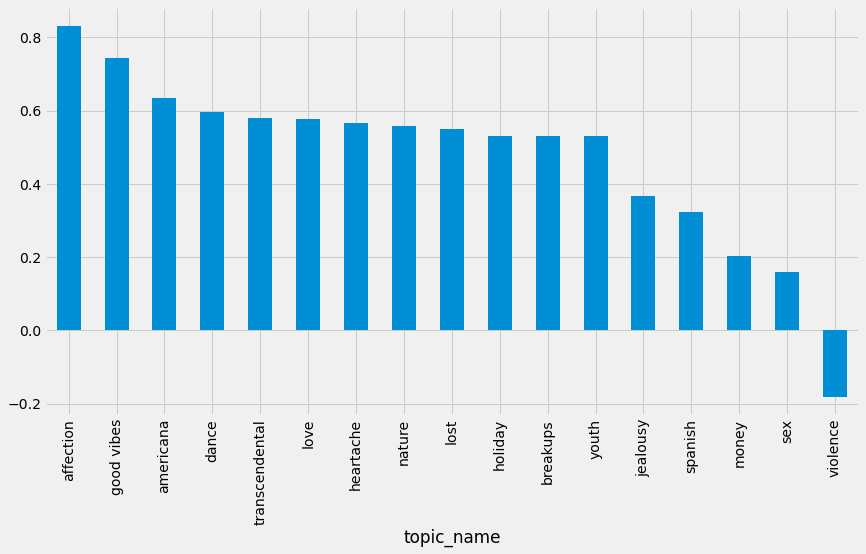

In [26]:
# What is the average sentiment for each topic?
df.groupby(['topic_name']).mean()['sentiment'].sort_values(ascending = False).plot(kind = 'bar')

In [61]:
# Most popular topics...
def topic_popularity(df):
    df.topic_name.value_counts().plot(kind = 'bar')
    return

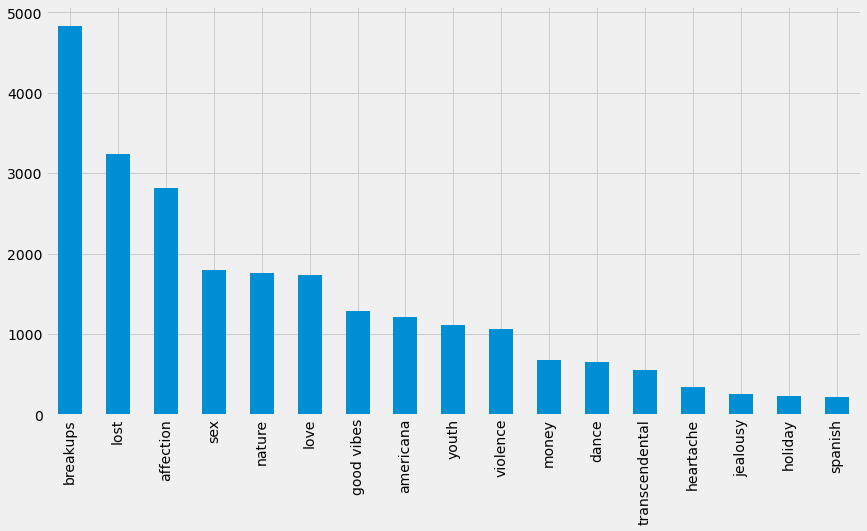

In [62]:
topic_popularity(df)

In [28]:
# What topics are most common in each decade?
train.groupby(['topic_name', 'decade']).size()\
                                    .unstack()\
                                    .sort_values(by = 'topic_name', 
                                                 ascending = False).T\
#                                     .plot(kind = 'bar', ec = 'black')
# plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.)

topic_name,youth,violence,transcendental,spanish,sex,nature,money,love,lost,jealousy,holiday,heartache,good vibes,dance,breakups,americana,affection
decade,,,,,,,,,,,,,,,,,
1950,30.0,1.0,5.0,4.0,2.0,25.0,6.0,18.0,47.0,2.0,5.0,5.0,6.0,4.0,47.0,27.0,69.0
1960,129.0,13.0,102.0,4.0,18.0,220.0,34.0,114.0,391.0,27.0,35.0,63.0,117.0,66.0,550.0,135.0,465.0
1970,155.0,17.0,88.0,13.0,12.0,233.0,48.0,153.0,337.0,32.0,23.0,54.0,127.0,82.0,477.0,97.0,345.0
1980,107.0,11.0,46.0,9.0,21.0,148.0,23.0,240.0,328.0,17.0,23.0,18.0,105.0,77.0,480.0,83.0,275.0
1990,59.0,42.0,34.0,12.0,163.0,120.0,45.0,131.0,209.0,17.0,10.0,15.0,115.0,38.0,334.0,45.0,213.0
2000,70.0,64.0,29.0,32.0,329.0,117.0,42.0,147.0,232.0,19.0,13.0,15.0,116.0,38.0,342.0,94.0,99.0
2010,87.0,285.0,22.0,32.0,366.0,103.0,123.0,129.0,215.0,26.0,16.0,21.0,131.0,46.0,354.0,157.0,114.0
2020,7.0,167.0,3.0,15.0,114.0,17.0,39.0,12.0,43.0,NaN,6.0,4.0,33.0,4.0,81.0,33.0,11.0


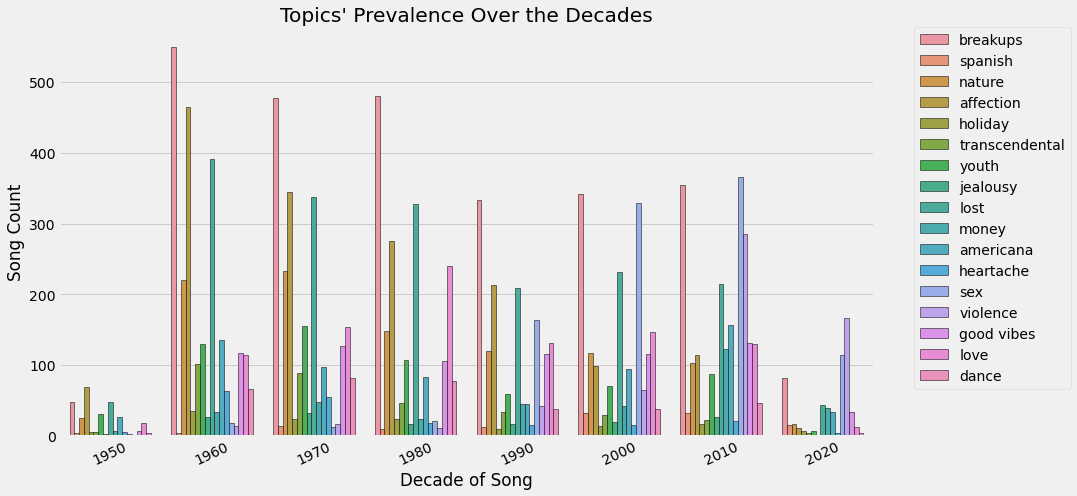

In [29]:
def all_topics_Prevalence(df)    
    ax = sns.countplot(data = df, x = 'decade', hue = 'topic_name', ec = 'black')
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.)
    plt.title('Topics\' Prevalence Over the Decades')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=25)
    plt.xlabel('Decade of Song')
    plt.ylabel('Song Count')
    plt.show()
    return

In [30]:
# What are the top 5 topics for each decade?
train.groupby(['decade']).topic_name.value_counts().head(19)


decade  topic_name    
1950    affection          69
        breakups           47
        lost               47
        youth              30
        americana          27
        nature             25
        love               18
        good vibes          6
        money               6
        heartache           5
        holiday             5
        transcendental      5
        dance               4
        spanish             4
        jealousy            2
        sex                 2
        violence            1
1960    breakups          550
        affection         465
Name: topic_name, dtype: int64

In [31]:
train.topic_name.value_counts()

breakups          2665
lost              1802
affection         1591
sex               1025
nature             983
love               944
good vibes         750
americana          671
youth              644
violence           600
money              360
dance              355
transcendental     329
heartache          195
jealousy           140
holiday            131
spanish            121
Name: topic_name, dtype: int64

In [33]:
# #create a variable that stores a list relationship topics
# relationships = ['affection','breakups','love', 'breakup', 
#                  'sex', 'heartache', 'jealousy']
# # make a copy
# train2 = train.copy()
# #add a column to the dataframe where any language not in the top five is represented by 'other'
# train2['relationship_topics'] = np.where(train2.topic_name.isin(relationships), train2.topic_name, 'other')
# train2 = train2.loc[train2['relationship_topics'] != 'other']

In [34]:
def relationship_bar(df):   
    # create a variable that stores a list relationship topics
    relationships = ['affection','breakups','love', 'breakup', 
                     'sex', 'heartache', 'jealousy']
    # make a copy
    train2 = df.copy()
    # add a column to the dataframe where any topic that is a relationship topic is gathered and all 
    # others are represented by 'other'
    train2['relationship_topics'] = np.where(train2.topic_name.isin(relationships), train2.topic_name, 'other')
    # drop anything that isn't a relationship topic
    train2 = train2.loc[train2['relationship_topics'] != 'other']
    train2.groupby('decade').relationship_topics.value_counts(normalize = True).unstack().plot(kind = 'bar', width = 1, ec = 'black')
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.)
    plt.title('Relationship Topics\' Prevalence Over the Decades')
    plt.xlabel('Decade of Song')
    plt.ylabel('Song Topic Count')
    plt.show()
    return


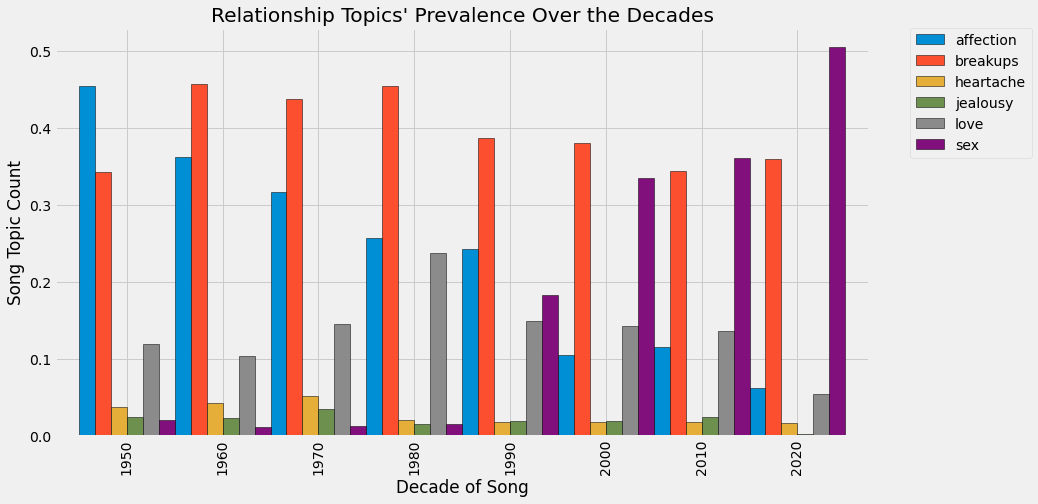

In [35]:
relationship_bar(df)

In [36]:
def relationships_swarm(df):  
    df5 = df.copy()
    df5['relationship_topics'] = np.where(df5['topic_name'].isin(['affection','love', 'sex', 
                                                         'heartache', 'jealousy','breakups']), df5['topic_name'], None)
    ax = sns.swarmplot(data = df5, x = 'relationship_topics', y = 'date')
    ax.set(title = '\'Breakup\' and \'Love\' Songs Have A Consistent Presence Over The Decades\nWhile It Appears \'Affection\' And \'Sex\' Show A Trade-off')
    plt.ylabel('Decades')
    plt.xlabel('Relationship Topics')
    return

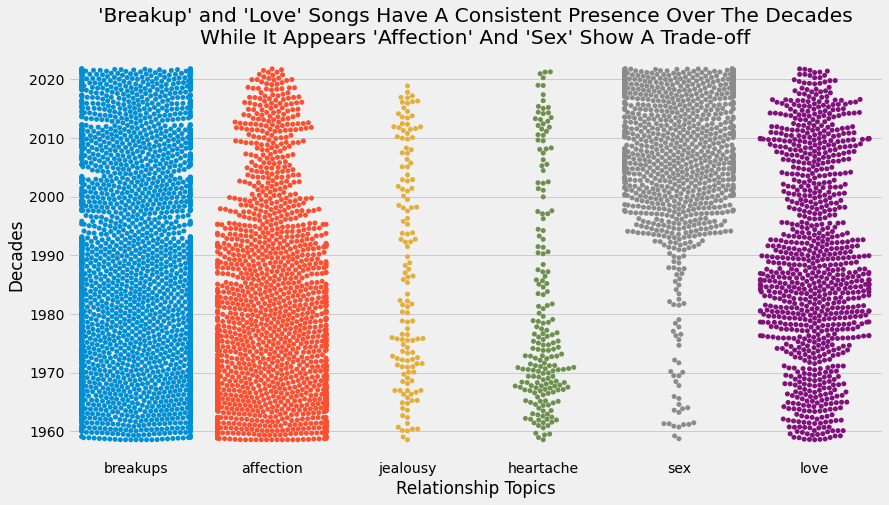

In [37]:
relationships_swarm(train)

In [41]:
def touch_swarm(df):  
    df6 = df.copy()
    # train3 = train3.sample(3_000)
    df6['affection_v_sex'] = np.where(df6['topic_name'].isin(['affection','sex']), df6['topic_name'], 
                                                    None)
    ax = sns.swarmplot(data = df6, x = 'affection_v_sex', y = 'date')
    ax.set(title = 'It Appears That Lyricists Have Become More Open To Full-on \'Sex\' Topics\nAs Opposed To More Subtle Lyrics Talking About \'Affection\'')
    plt.ylabel('Decades')
    plt.xlabel('Topics of Intimacy')
    return

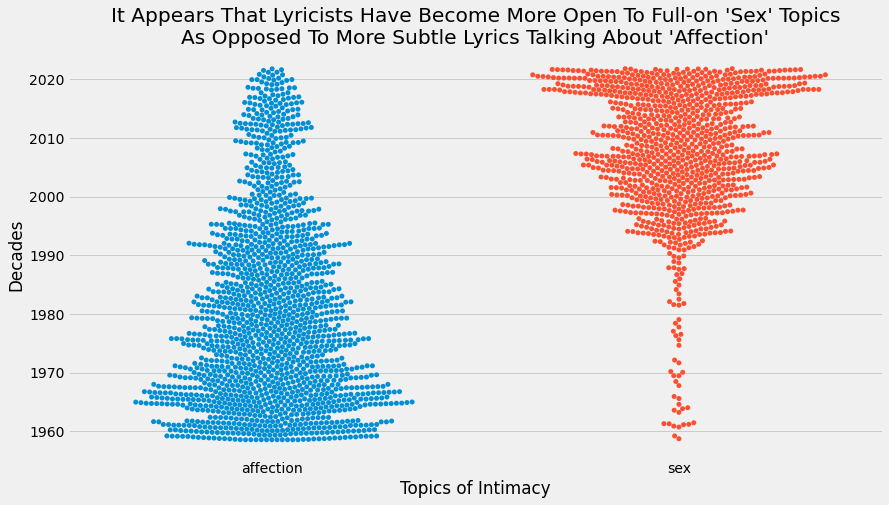

In [42]:
touch_swarm(train)

In [43]:
def vice_bar(df):   
    # create a variable that stores a list relationship topics
    vices = ['sex', 'money', 'violence']
    # make a copy
    df3 = df.copy()
    # add a column to the dataframe where any topic that is a vices topic is gathered and all 
    # others are represented by 'other'
    df3['vice_topics'] = np.where(df3.topic_name.isin(vices), df3.topic_name, 'other')
    # drop anything that isn't a relationship topic
    df3 = df3.loc[df3['vice_topics'] != 'other']
    df3.groupby('decade').topic_name.value_counts(normalize = True).unstack().plot(kind = 'bar', width = 1, ec = 'black')
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.)
    plt.title('Vice Topics\' Prevalence Over the Decades')
    plt.xlabel('Decade of Song')
    plt.ylabel('Song Topic Count')
    plt.show()
    return

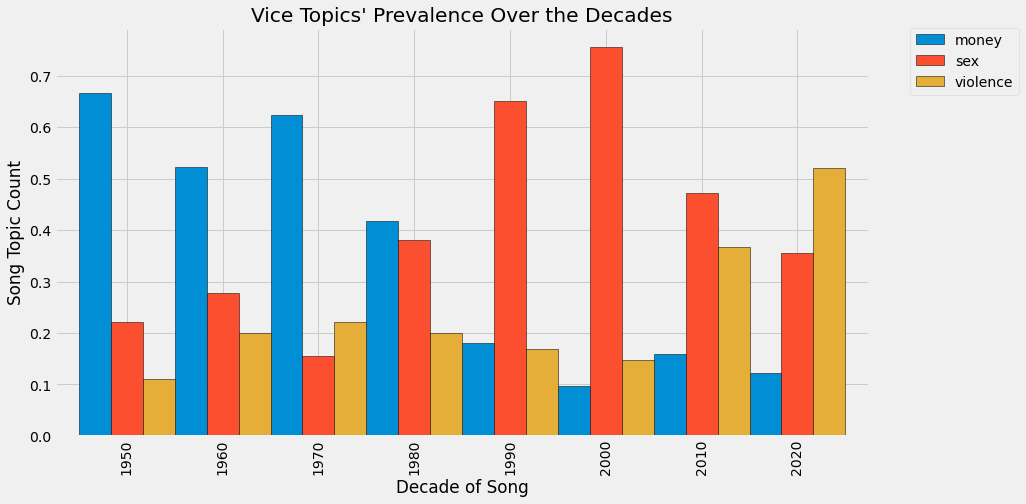

In [44]:
vice_bar(train)

In [45]:
def vice_swarm(df):  
    df4 = df.copy()
    # train3 = train3.sample(3_000)
    df4['vices'] = np.where(df4['topic_name'].isin(['sex', 'money', 'violence']), df4['topic_name'], 
                                                    None)
    ax = sns.swarmplot(data = df4, x = 'vices', y = 'date')
    ax.set(title = 'Vice Topics Have Increased Significantly Beginning In The 90\'s')
    plt.ylabel('Decades')
    plt.xlabel('Top 3 \'Vice\' Topics')
    return

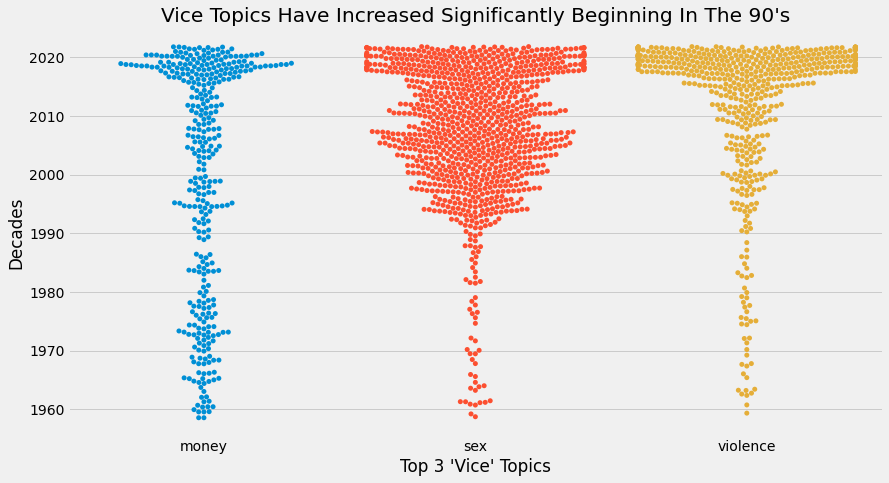

In [46]:
vice_swarm(train)